In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
# to remove error on pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

In [3]:
# tech stocks 
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'AMD', 'FB', 'MU', 'NVDA']

In [4]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN', 'AMD', 'FB', 'MU', 'NVDA']

In [5]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [6]:
for stocks in tech_list:
    globals()[stocks] = data.DataReader(stocks,'quandl', start, end)

In [7]:
#top inforamtion about stock
MU.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,116.000000,116.000000,116.000000,116.000000,1.160000e+02,116.0,116.0,116.000000,116.000000,116.000000,116.000000,1.160000e+02
mean,45.595302,46.369874,44.685327,45.579741,4.501570e+07,0.0,1.0,45.595302,46.369874,44.685327,45.579741,4.501570e+07
std,5.487386,5.586126,5.245446,5.412964,2.077417e+07,0.0,0.0,5.487386,5.586126,5.245446,5.412964,2.077417e+07
min,39.720000,40.940000,37.520000,39.620000,1.419656e+07,0.0,1.0,39.720000,40.940000,37.520000,39.620000,1.419656e+07
25%,42.000000,42.873450,41.462500,42.040000,3.018090e+07,0.0,1.0,42.000000,42.873450,41.462500,42.040000,3.018090e+07
50%,43.742500,44.360000,42.815000,43.710000,4.041049e+07,0.0,1.0,43.742500,44.360000,42.815000,43.710000,4.041049e+07
75%,46.517500,47.135000,45.463900,46.617500,5.174688e+07,0.0,1.0,46.517500,47.135000,45.463900,46.617500,5.174688e+07
max,62.170000,63.420000,60.600000,61.150000,1.409498e+08,0.0,1.0,62.170000,63.420000,60.600000,61.150000,1.409498e+08


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2018-03-27 to 2017-10-09
Data columns (total 12 columns):
Open          116 non-null float64
High          116 non-null float64
Low           116 non-null float64
Close         116 non-null float64
Volume        116 non-null float64
ExDividend    116 non-null float64
SplitRatio    116 non-null float64
AdjOpen       116 non-null float64
AdjHigh       116 non-null float64
AdjLow        116 non-null float64
AdjClose      116 non-null float64
AdjVolume     116 non-null float64
dtypes: float64(12)
memory usage: 11.8 KB


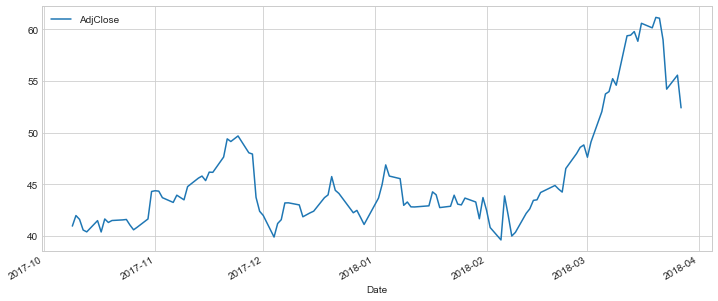

In [9]:
# year trend of MU (Micron) Stock
MU ['AdjClose'].plot(legend = True, figsize=(12,5))

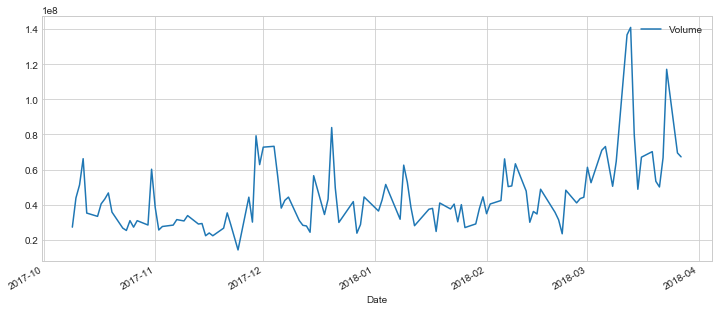

In [10]:
#plotting volume for 17-18 of MU stock
MU ['Volume'].plot(legend = True, figsize=(12,5))

In [11]:
#moving average of MU
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MU[column_name] = Series.rolling(MU['AdjClose'],window=ma).mean()

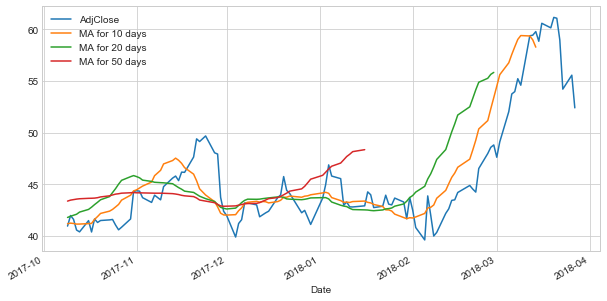

In [12]:
#plot Moving average for MU
MU[['AdjClose','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,5))

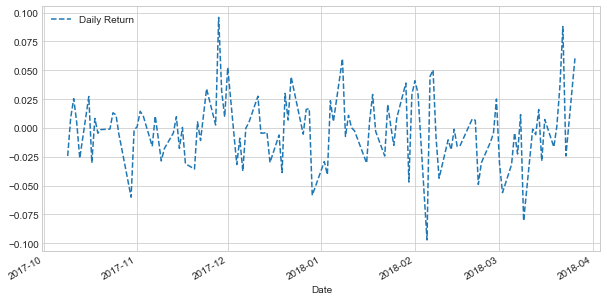

In [13]:
# percentage daily Returns for Micron

MU ['Daily Return'] = MU['AdjClose'].pct_change()

MU ['Daily Return'].plot(figsize=(10,5),legend = True, linestyle='--')

C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


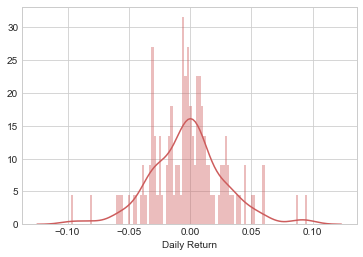

In [14]:
#distribution plot on MU stock using seaborn library 
sns.distplot(MU['Daily Return'].dropna(), bins=100, color = 'indianred')

In [45]:

closing_df = DataFrame({'GOOG': GOOG['AdjClose'], 'MSFT': MSFT['AdjClose'],'AMD': AMD['AdjClose'],'FB' : FB['AdjClose'], 'MU' : MU['AdjClose'], 'NVDA' : NVDA['AdjClose']})

In [46]:
closing_df.head()

,AMD,FB,GOOG,MSFT,MU,NVDA
Date,,,,,,
2018-03-27,10.00,152.19,1005.10,89.47,52.40,225.52
2018-03-26,10.44,160.06,1053.21,93.78,55.56,244.48
2018-03-23,10.63,159.39,1021.57,87.18,54.21,232.97
2018-03-22,10.91,164.89,1049.08,89.79,58.97,241.85
2018-03-21,11.26,169.39,1090.88,92.48,61.07,248.56


In [47]:
tech_rets = closing_df.pct_change()

In [48]:
tech_rets

,AMD,FB,GOOG,MSFT,MU,NVDA
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,0.044000,0.051712,0.047866,0.048173,0.060305,0.084072
2018-03-23,0.018199,-0.004186,-0.030041,-0.070377,-0.024298,-0.047080
2018-03-22,0.026341,0.034507,0.026929,0.029938,0.087807,0.038116
2018-03-21,0.032081,0.027291,0.039844,0.029959,0.035611,0.027744
2018-03-20,-0.013321,-0.007320,0.006261,0.007029,0.001310,0.004104
2018-03-19,0.028803,0.026227,0.001922,-0.002577,-0.016517,-0.034378
2018-03-16,0.003500,0.072612,0.032651,0.018409,0.007316,0.039336
2018-03-15,-0.000872,-0.006645,0.012195,-0.004440,-0.028722,-0.004551


C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


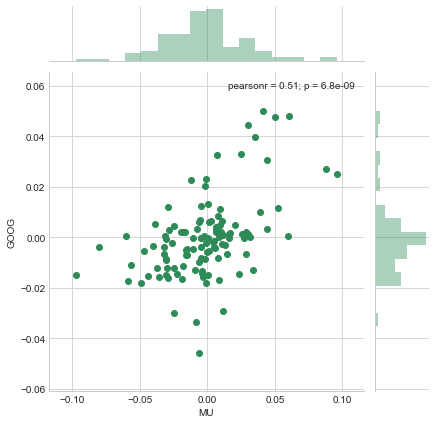

In [49]:
#correlation of Micron with google stock
sns.jointplot('MU', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


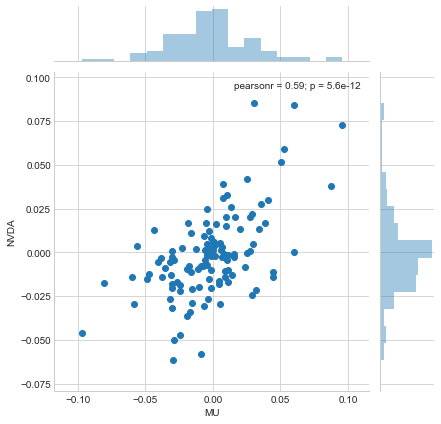

In [50]:
#correlation of Micron with google stock
sns.jointplot('MU', 'NVDA', tech_rets, kind = 'scatter')

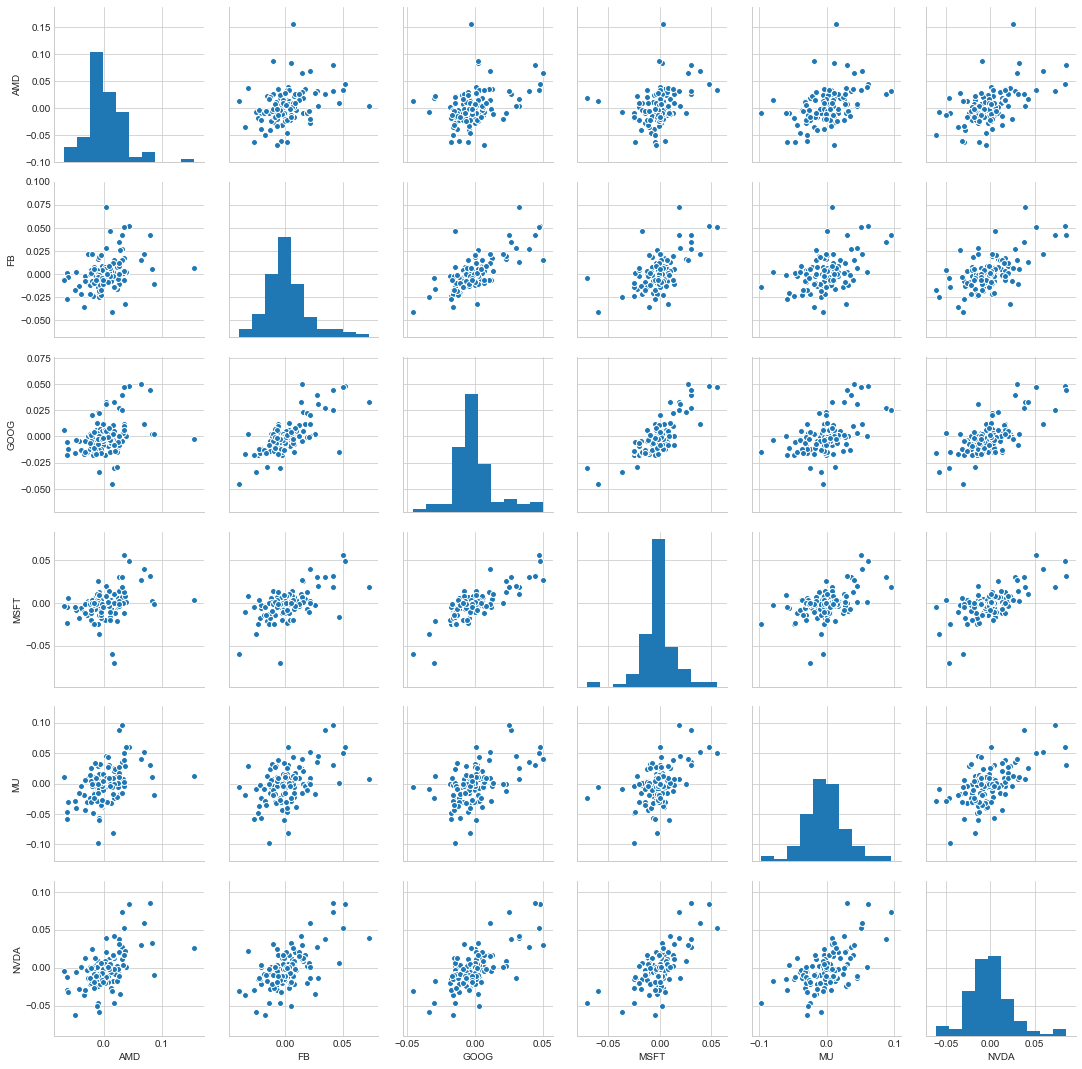

In [51]:
#corelation and comparing all stocks with each other
sns.pairplot(tech_rets.dropna())

C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following

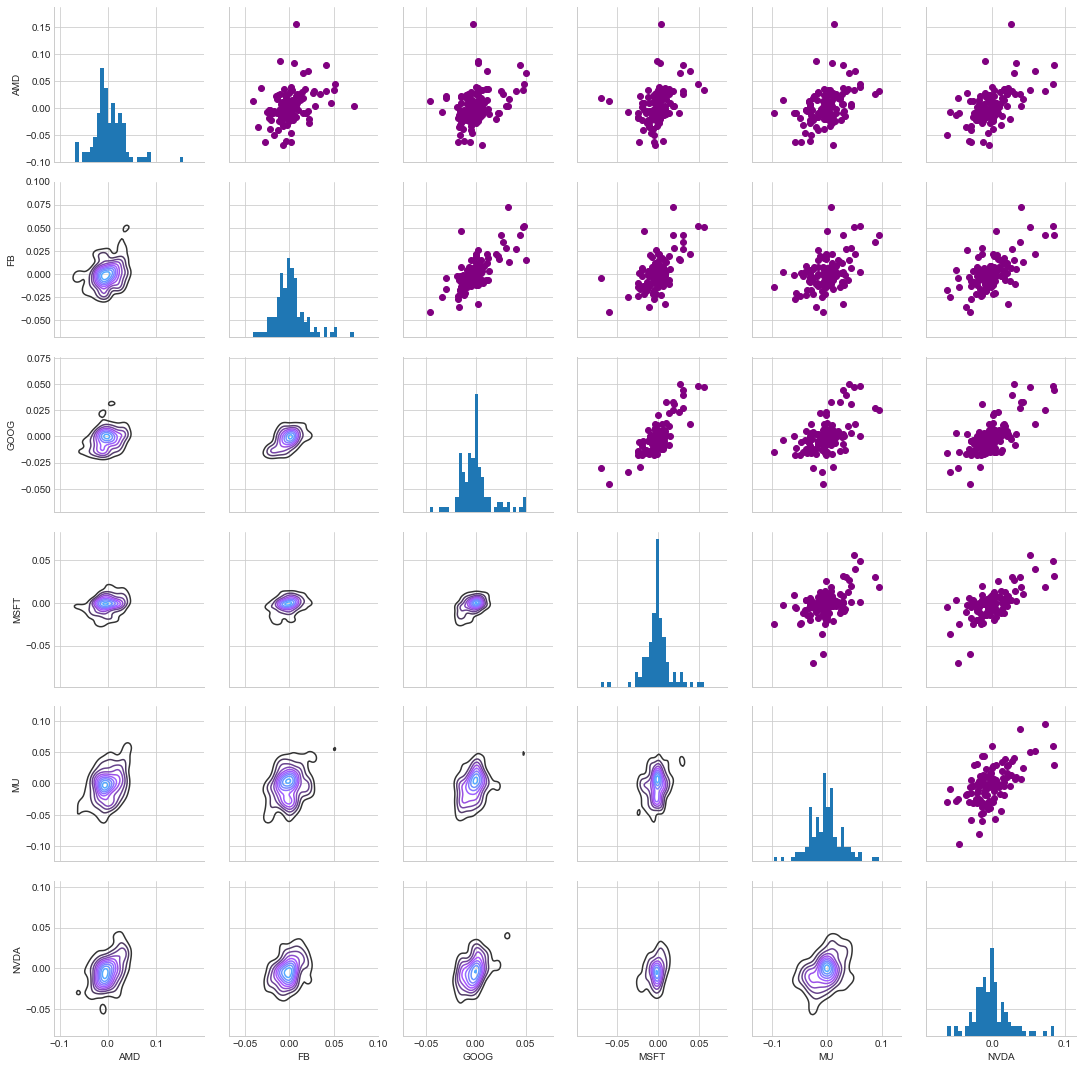

In [52]:
#grid corelation of all tech stock from dataframe (daily %change)

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\28751\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following

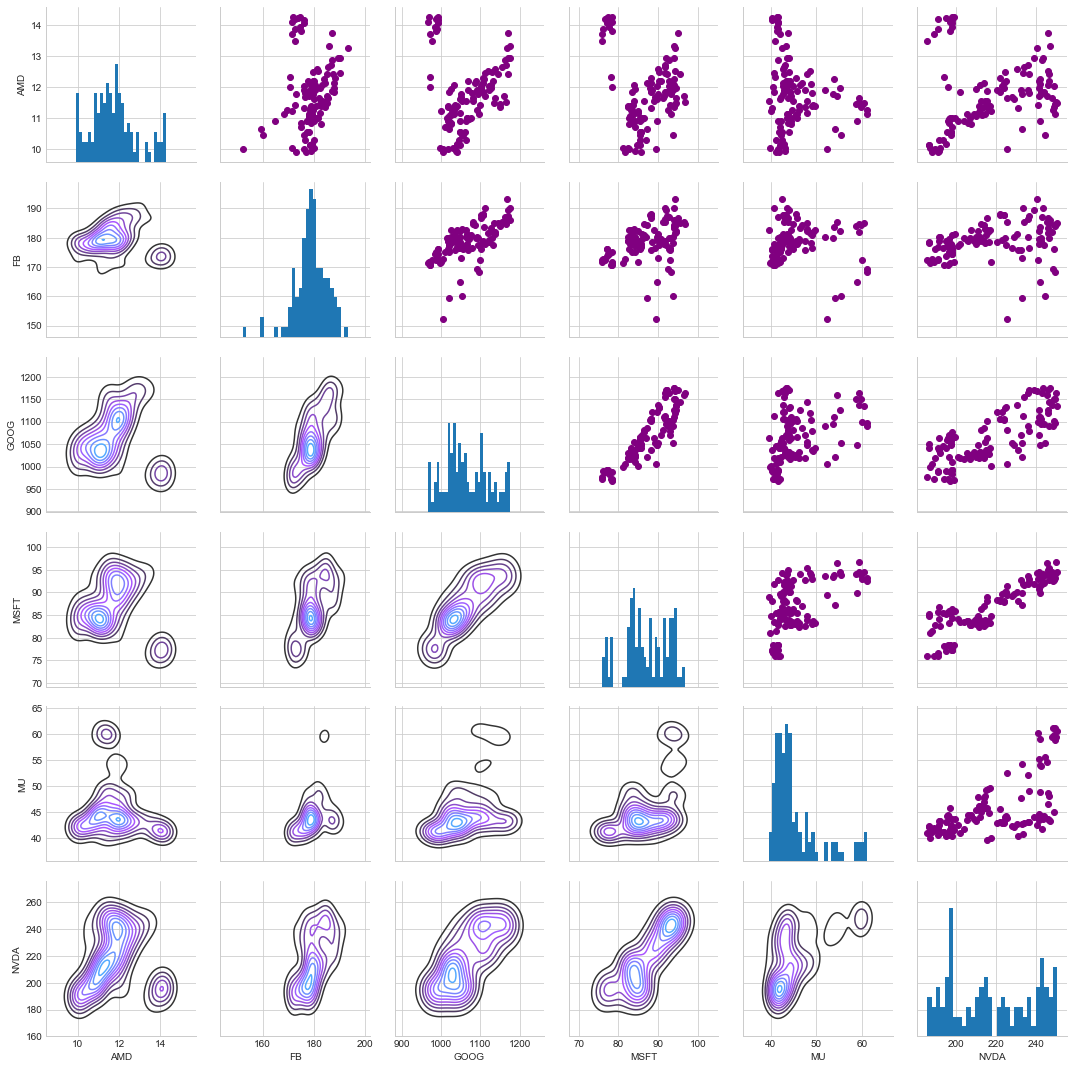

In [53]:
#grid corelation of all tech stock from dataframe (closing prices)

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

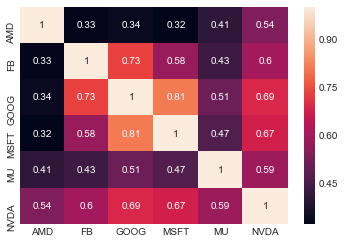

In [57]:
#heatmap correlation of tech stock
sns.heatmap(data=tech_rets.corr(),annot=True)

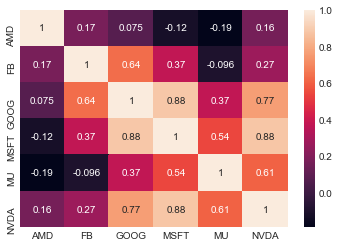

In [58]:
#corelation of closing prices 
sns.heatmap(data=closing_df.corr(),annot=True)

In [59]:
rets = tech_rets.dropna()

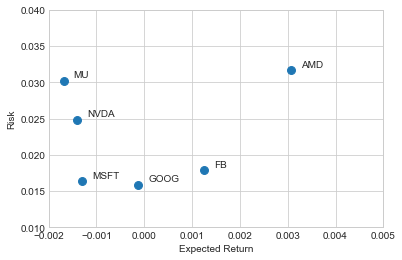

In [108]:
#Extected Risk Vs Return plot of Tech stocks

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim(-0.002,0.005)
plt.ylim(0.01,0.04)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
            xy=(x,y),xytext=(10, 10), 
            textcoords='offset points', ha='left', va = 'top')


In [115]:
# For MU - With 95% confidence, our wrost daily loss will not exceed 4.75%.   
rets['MU'].quantile(0.05)

-0.04752270028544573

In [116]:
#monte carlo method 

days = 365
dt = 1/days
mu = rets.mean()['MU']
sigma = rets.std()['MU']

In [117]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [118]:
MU.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,,,,,
2018-03-27,55.06,55.47,51.68,52.40,67229050.0,0.0,1.0,55.06,55.47,51.68,52.40,67229050.0,NaN,NaN,NaN,NaN
2018-03-26,56.26,56.71,52.72,55.56,69445328.0,0.0,1.0,56.26,56.71,52.72,55.56,69445328.0,NaN,NaN,NaN,0.060305
2018-03-23,57.69,58.80,53.68,54.21,117093861.0,0.0,1.0,57.69,58.80,53.68,54.21,117093861.0,NaN,NaN,NaN,-0.024298
2018-03-22,60.07,60.30,58.11,58.97,66693263.0,0.0,1.0,60.07,60.30,58.11,58.97,66693263.0,NaN,NaN,NaN,0.087807
2018-03-21,61.35,61.72,60.60,61.07,50063889.0,0.0,1.0,61.35,61.72,60.60,61.07,50063889.0,NaN,NaN,NaN,0.035611


Text(0.5,1,'Monte Carlo Analysis of Micron')

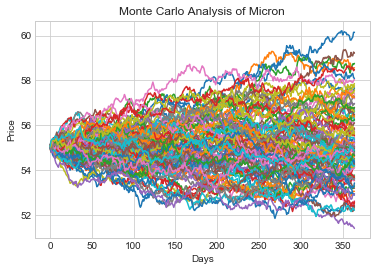

In [119]:
start_price =  55.06

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis of Micron')

In [121]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final Price Distribution of Micron Stock after 365 days')

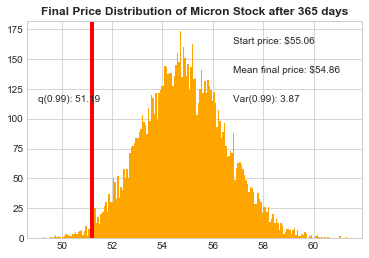

In [131]:
#Final Price Distribution of Micron Stock ~ According to monte carlo similuation, 99% of times value at 
#risk is $3.87 

q = np.percentile(simulations,1)

plt.hist(simulations,bins=200, color='orange')
plt.figtext(0.6,0.8, s = 'Start price: $%.2f' %start_price)
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())
plt.figtext(0.6,0.6, "Var(0.99): %.2f" %(start_price - q))
plt.figtext(0.15,0.6, "q(0.99): %.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final Price Distribution of Micron Stock after %s days" %days, weight="bold")